In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load and clean dataset
df = pd.read_csv("StudentPerformanceFactors.csv")
df = df.dropna()

In [3]:
#Linear regression (Hours only)

X = df[["Hours_Studied"]]
y = df["Exam_Score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)

mse_lin = mean_squared_error(y_test, y_pred)
r2_lin = r2_score(y_test, y_pred)

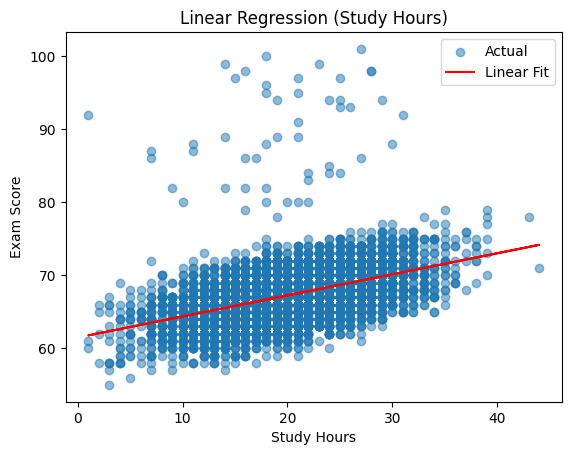

In [7]:
# Plot linear regression line
plt.scatter(X, y, alpha=0.5, label="Actual")
plt.plot(X, lin_model.predict(X), color="red", label="Linear Fit")
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.title("Linear Regression (Study Hours)")
plt.legend()
plt.savefig("linear_regression.png")
plt.show()


In [5]:
# Polynomial regression (degree=2)

poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)
y_poly_pred = poly_model.predict(X_test)

mse_poly = mean_squared_error(y_test, y_poly_pred)
r2_poly = r2_score(y_test, y_poly_pred)


c:\Users\e\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


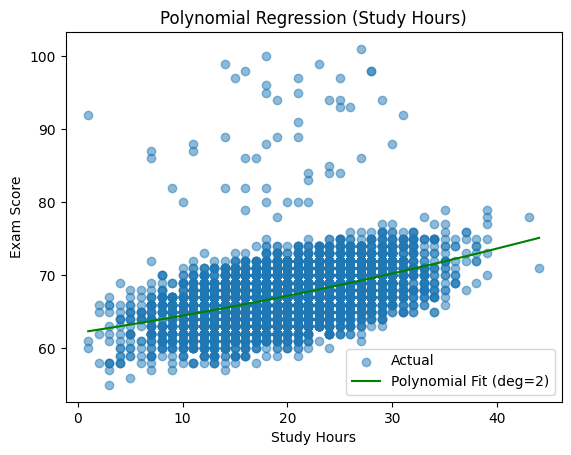

In [8]:
# Plot polynomial regression curve
X_sorted = np.sort(X.values, axis=0)
plt.scatter(X, y, alpha=0.5, label="Actual")
plt.plot(X_sorted, poly_model.predict(X_sorted), color="green", label="Polynomial Fit (deg=2)")
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.title("Polynomial Regression (Study Hours)")
plt.legend()
plt.savefig("polynomial_regression.png")
plt.show()

In [9]:
#Multi-feature regression

features = ["Hours_Studied", "Sleep_Hours", "Attendance"]
X_multi = df[features]
y_multi = df["Exam_Score"]

X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

multi_model = LinearRegression()
multi_model.fit(X_train, y_train)
y_multi_pred = multi_model.predict(X_test)

mse_multi = mean_squared_error(y_test, y_multi_pred)
r2_multi = r2_score(y_test, y_multi_pred)

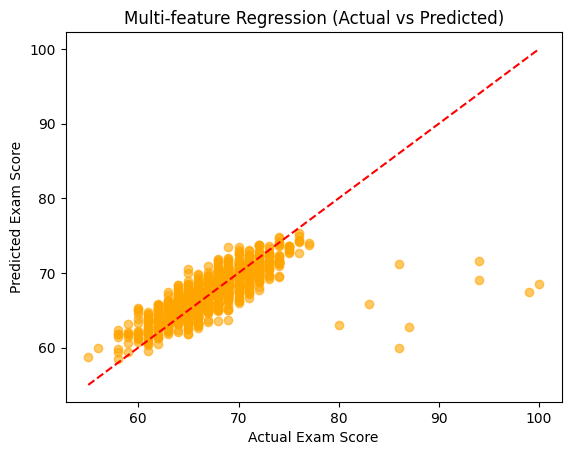

In [10]:
# Plot actual vs predicted for multi-feature regression
plt.scatter(y_test, y_multi_pred, alpha=0.6, color="orange")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Multi-feature Regression (Actual vs Predicted)")
plt.savefig("multi_feature_regression.png")
plt.show()

In [11]:
#Compare models in a table

results = pd.DataFrame({
    "Model": [
        "Linear Regression (Hours_Studied only)",
        "Polynomial Regression (degree=2)",
        "Linear Regression (Multi-features)"
    ],
    "MSE": [mse_lin, mse_poly, mse_multi],
    "R² Score": [r2_lin, r2_poly, r2_multi]
})

print(results)

                                    Model        MSE  R² Score
0  Linear Regression (Hours_Studied only)  12.351734  0.205131
1        Polynomial Regression (degree=2)  12.352544  0.205078
2      Linear Regression (Multi-features)   7.018641  0.548330
